<a href="https://colab.research.google.com/github/ashmeenkhaira/DSA-in-JAVA/blob/main/housing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
file_path = "/content/sample_data/housing.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


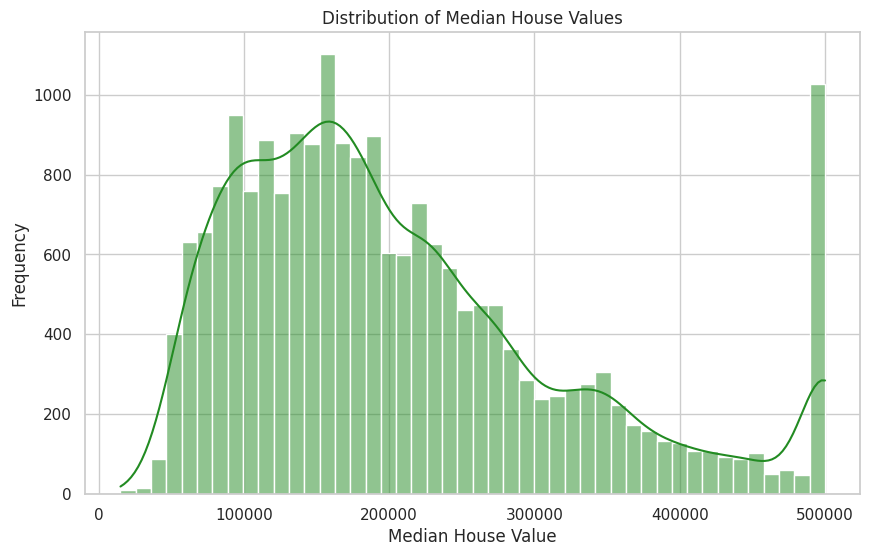

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


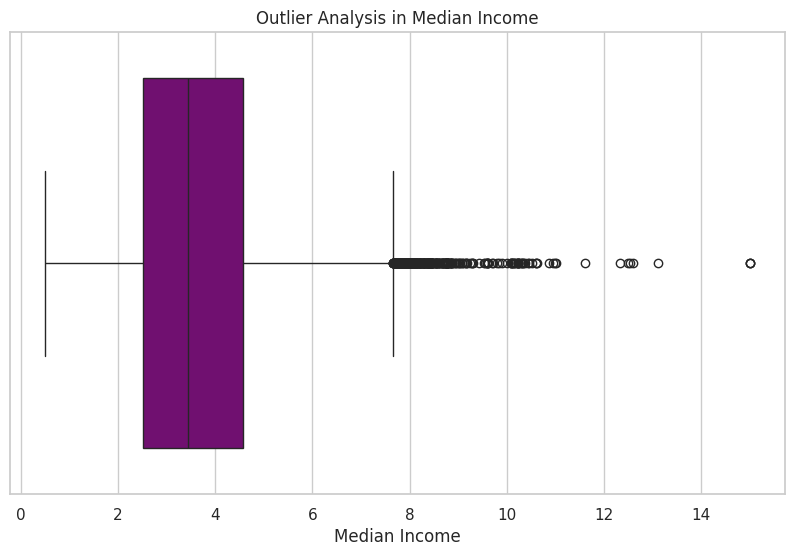

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [ ]:
data = data_no_outliers_2

In [ ]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [ ]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,True,False,False,False
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,False,True,False,False
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,True,False,False,False
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,False,True,False,False
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,True,False,False,False
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,False,True,False,False
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,False,True,False,False
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,False,True,False,False


In [ ]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const


,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,True,False,False,False
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,False,True,False,False
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,True,False,False,False
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,False,True,False,False
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,True,False,False,False
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,False,True,False,False
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,False,True,False,False
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,False,True,False,False


In [ ]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]

print(f"X dtypes before conversion: {X.dtypes}")
print(f"y dtypes before conversion: {y.dtypes}")


# Convert the features and target to float64
X = X.astype('float64')
y = y.astype('float64')



# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

X dtypes before conversion: longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
y dtypes before conversion: median_house_value    float64
dtype: object
Training set size: 15220 samples
Test set size: 3806 samples
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:       

In [ ]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
7322,153414.201880
465,239312.044180
12768,70054.781175
2617,189568.171319
13351,184267.795032
...,...
11691,171568.742378
1454,215893.783794
7360,129935.765388
19118,232846.312809


In [ ]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1.0,0.0,0.0,0.0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0.0,0.0,1.0,0.0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0.0,1.0,0.0,0.0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0.0,0.0,0.0,1.0
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,1.0,0.0,0.0,0.0
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,0.0,1.0,0.0,0.0
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,1.0,0.0,0.0,0.0
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,1.0,0.0,0.0,0.0


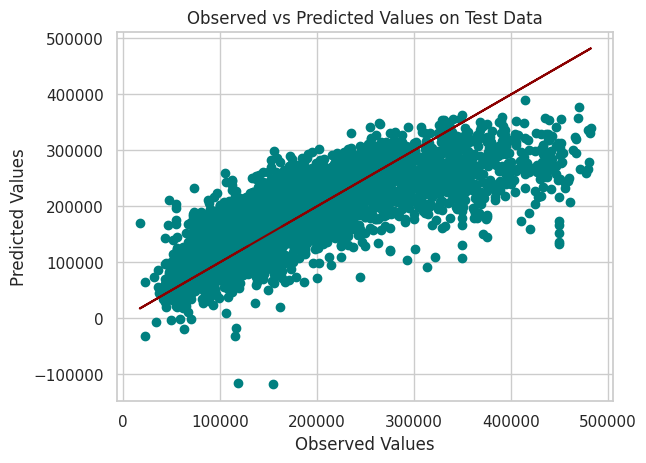

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "teal")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()


In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is 0.0


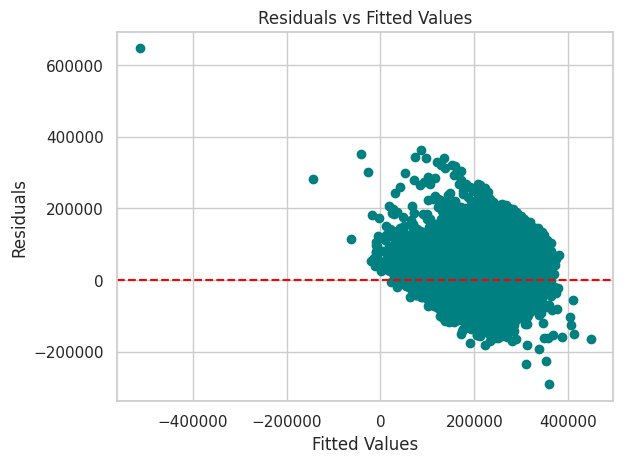

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "teal")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')


Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


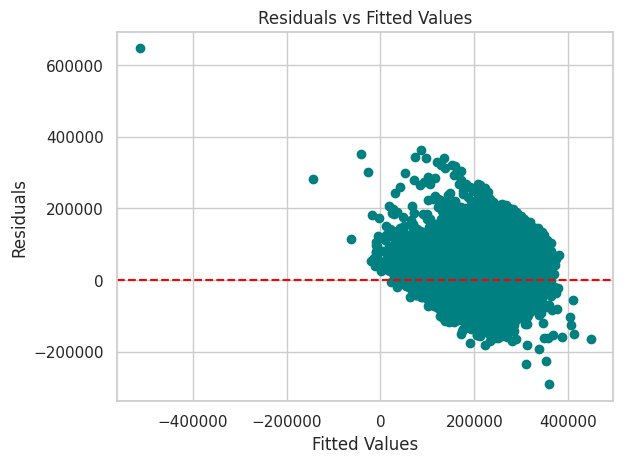

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "teal")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.88869441674


In [ ]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
